# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


In [142]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt



In [143]:
def f(x):
    return -x**4 + 4*x**2 - 2*x + 13

def f2(x, y, z):
    return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

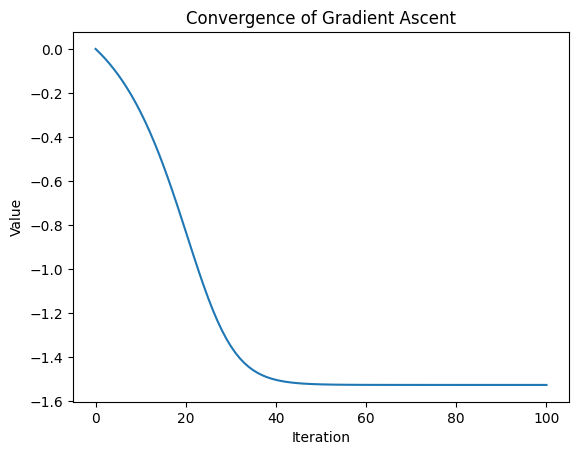

Optimal value: -1.5256868600845337


In [144]:
iter = 100
learningRate = 0.01

x = torch.tensor([0.0], requires_grad=True)
conv = [x.item()]
optimizer = torch.optim.SGD([x], lr=learningRate, maximize=True)

for _ in range(iter):
    optimizer.zero_grad()
    loss = f(x)
    loss.backward()
    optimizer.step()
    conv.append(x.item())
plt.plot(range(iter+1), conv)
plt.title('Convergence of Gradient Ascent')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()
print(f'Optimal value: {x.item()}')

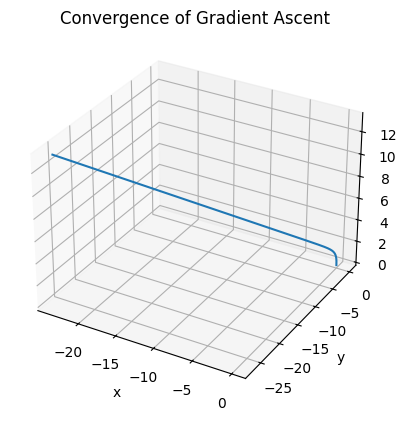

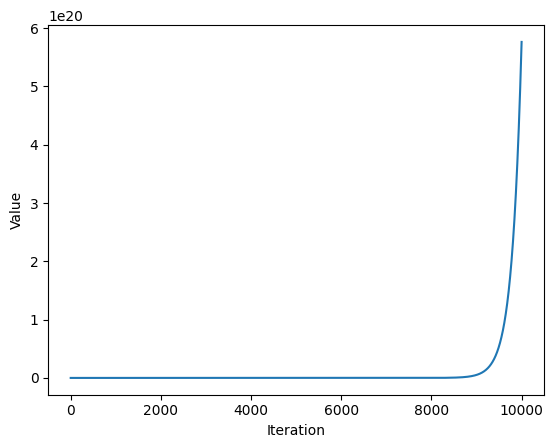

Optimal values: x = -44191027200.0, y = -49407078400.0, z = 22095513600.0


In [145]:
iter = 10000
learningRate = 0.01

x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

conv = [[x.item()], [y.item()], [z.item()]]
optimizer = torch.optim.SGD([x, y, z], lr=learningRate, maximize=True)

for _ in range(iter):
    optimizer.zero_grad()
    loss = f2(x, y, z)
    loss.backward()
    optimizer.step()
    conv[0].append(x.item())
    conv[1].append(y.item())
    conv[2].append(z.item())
    
limit = 1000
plt.figure().add_subplot(111, projection='3d').plot(conv[0][:limit], conv[1][:limit], conv[2][:limit])
plt.xlabel('x'), plt.ylabel('y')
plt.title('Convergence of Gradient Ascent')
plt.show()
plt.plot(range(iter+1), [f2(conv[0][i], conv[1][i], conv[2][i]) for i in range(iter+1)])
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.show()
print(f'Optimal values: x = {x.item()}, y = {y.item()}, z = {z.item()}')

It seems like the second function doesn't approach any maximum

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [378]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [147]:
from torch.autograd import Variable   

learningRate = 0.01 
epochs = 1000

model = torch.nn.Linear(1, 1) 

mse = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):

    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = mse(outputs, labels)
    
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch: {}, MSE: {}, model: {}, {}'.format(epoch, loss.item(), model.weight.item(), model.bias.item()))
 


epoch: 0, MSE: 345.91143798828125, model: 1.9017542600631714, -0.10761049389839172
epoch: 1, MSE: 52.54340744018555, model: 2.5934078693389893, -0.03702523559331894
epoch: 2, MSE: 20.205120086669922, model: 2.821824073791504, 0.039675213396549225
epoch: 3, MSE: 16.136327743530273, model: 2.897838830947876, 0.11732738465070724
epoch: 4, MSE: 15.148943901062012, model: 2.9237029552459717, 0.19425374269485474
epoch: 5, MSE: 14.516470909118652, model: 2.9330530166625977, 0.26992303133010864
epoch: 6, MSE: 13.943035125732422, model: 2.9369540214538574, 0.344180703163147
epoch: 7, MSE: 13.395798683166504, model: 2.9390459060668945, 0.416995644569397
epoch: 8, MSE: 12.870443344116211, model: 2.9405269622802734, 0.48837706446647644
epoch: 9, MSE: 12.365750312805176, model: 2.941791296005249, 0.5583469867706299
epoch: 10, MSE: 11.880860328674316, model: 2.9429688453674316, 0.6269312500953674
epoch: 11, MSE: 11.415003776550293, model: 2.9441027641296387, 0.6941566467285156
epoch: 12, MSE: 10.967

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


In [407]:

import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


def linearReg(X, y, learning_rate, epochs):
    model = torch.nn.Linear(1, 1) 

    mse = torch.nn.MSELoss() 
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    for _ in range(epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = mse(outputs, labels)
        loss.backward()
        optimizer.step()
        conv.append(loss.item())
        # print('epoch: {}, MSE: {}'.format(epoch, loss.item()))
    print('MSE: {}, model: {}, {}'.format(loss.item(), model.weight.item(), model.bias.item()))
    plt.plot(range(epochs), conv)
    plt.title('(Linear) Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()

    weights = model.weight.item()
    bias = model.bias.item()
    return conv, weights, bias


MSE: 0.009924414567649364, model: 2.9996845722198486, 4.019050121307373


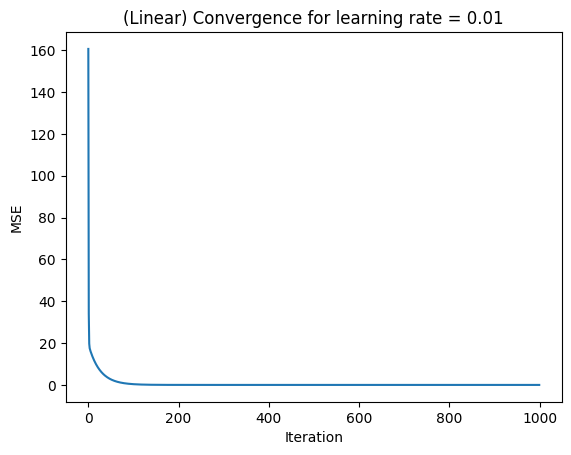

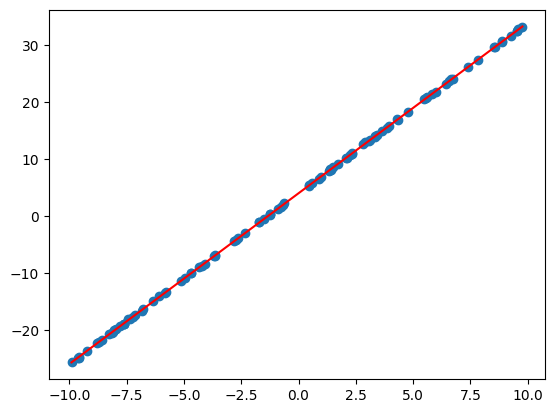

In [408]:
linearConv, w, b = linearReg(X, y, 0.01, 1000)

plt.scatter(X, y)
Xh_sorted = np.sort(X)
plt.plot(Xh_sorted, w*Xh_sorted + b, color='red')


MSE: 0.4068322777748108, model: -0.08494650572538376, -0.0431613065302372


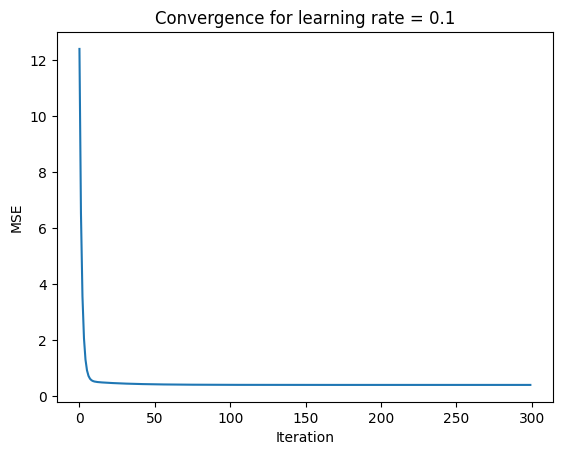

In [ ]:
l = linearReg(X, y, 0.1, 1000)

MSE: 0.4068357050418854, model: -0.08496855199337006, -0.04615895822644234


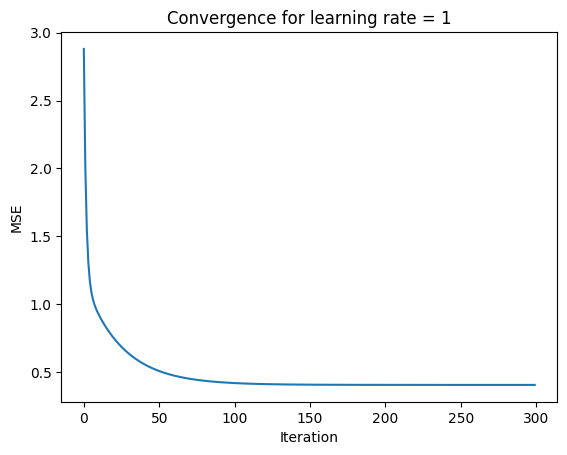

In [ ]:
l = linearReg(X, y, 1, 1000)

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [325]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


In [401]:

np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

# I will use the fact that we can use the linear regression model to fit a polynomial regression model by using matrix multiplication
def polymonialReg(X, y, learning_rate, degree, epochs):
    Xh = X.copy()
    yh = y.copy()
    model = torch.nn.Linear(degree, 1)
    

    mse = torch.nn.MSELoss() 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    for _ in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(torch.cat([inputs**i for i in range(1, degree + 1)], 1))

        loss = mse(outputs, labels)
        loss.backward()
        optimizer.step()
        conv.append(loss.item())

    weights = model.weight.detach().numpy().flatten()
    bias = model.bias.item()
    
    print('MSE: {}, model: ws={}, b={}'.format(loss.item(), weights, bias))
    plt.plot(range(epochs), conv)
    plt.title('(Poly) Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    
    return conv, weights, bias

MSE: 16.00111961364746, model: ws=[ 3.1625307 -1.8371493  2.8229063], b=2.4792637825012207


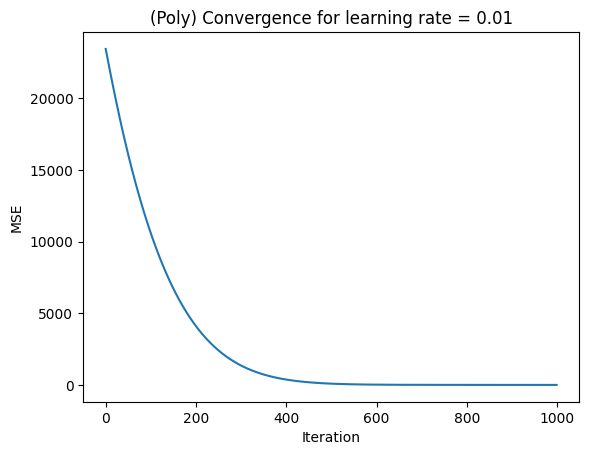

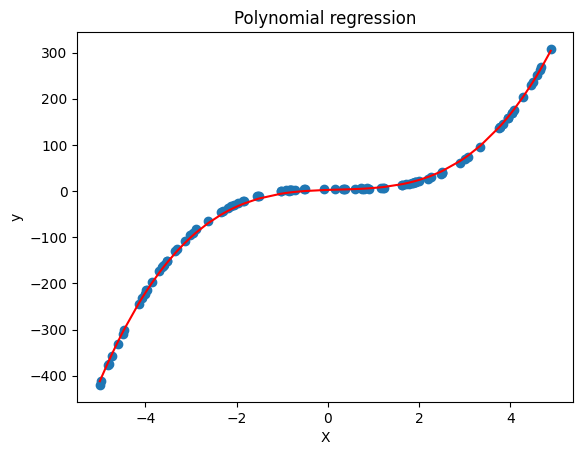

In [403]:
degree = 3
polyConv, weights, bias = polymonialReg(X, y, 0.01, degree, 1000)

plt.scatter(X, y)
Xh_sorted, yh_sorted = zip(*sorted(zip(X, y)))
plt.plot(Xh_sorted, sum([weights[i-1] * np.array(Xh_sorted)**i for i in range(1, degree + 1)]) + bias, color='red')
plt.title('Polynomial regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Comparision of loss for polymonial and linear regression:

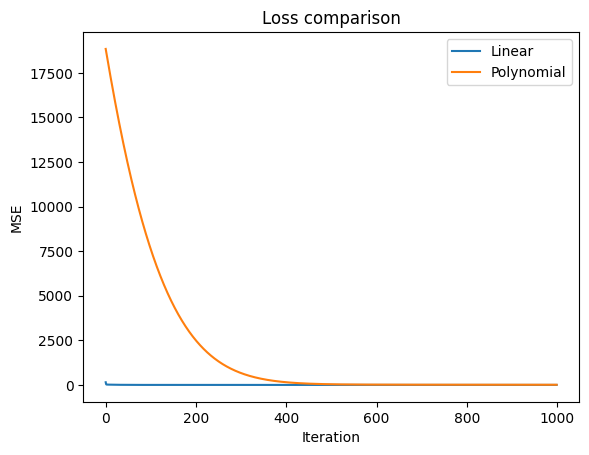

In [390]:
plt.plot(range(1000), linearConv, label='Linear')
plt.plot(range(1000), polyConv, label='Polynomial')
plt.title('Loss comparison')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

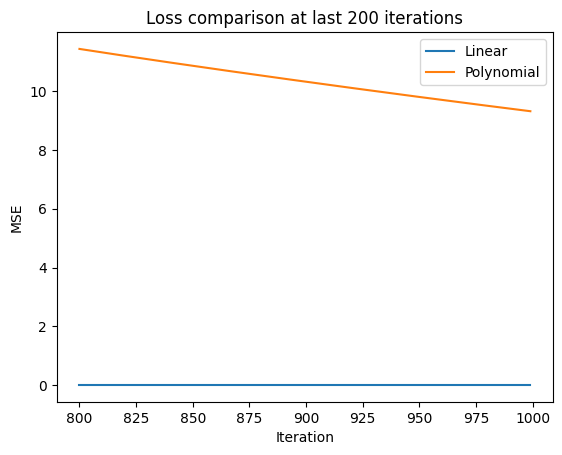

In [393]:
s = 800
plt.plot(range(s, 1000), linearConv[s:], label='Linear')
plt.plot(range(s, 1000), polyConv[s:], label='Polynomial')
plt.title('Loss comparison at last 200 iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [410]:

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon



**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


MSE: 3336.6767578125, model: 1.884124994277954, 59.51642990112305


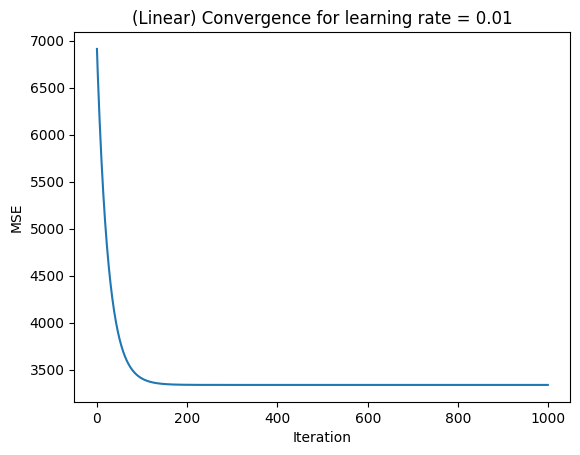

MSE: 874997219328.0, model: ws=[-0.39993244 -0.03804345 -0.36939678  0.11230811  0.01851614  0.44833174
 -0.3566541   0.43529344  0.00478579 -0.00488494], b=0.24144072830677032


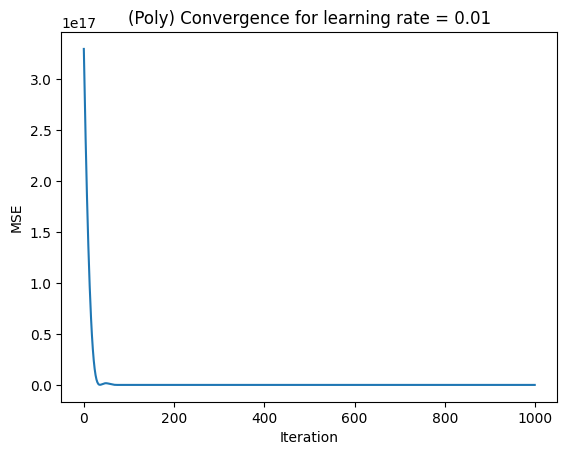

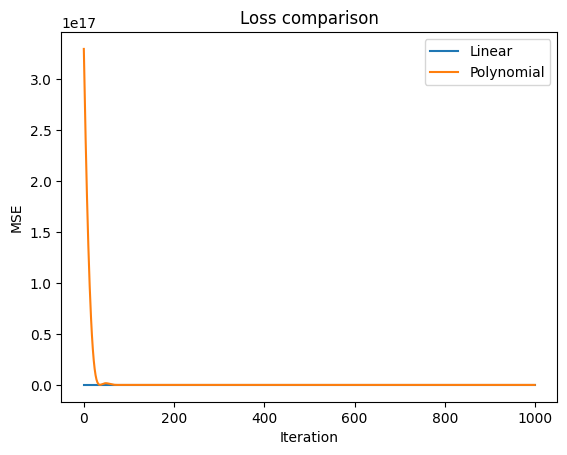

In [411]:
linConv, _, _ = linearReg(X, y, 0.01, 1000)
polyConv, _, _ = polymonialReg(X, y, 0.01, 10, 1000)
plt.plot(range(1000), linConv, label='Linear')
plt.plot(range(1000), polyConv, label='Polynomial')
plt.title('Loss comparison')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

MSE with L2: 396104990720.0, model: ws=[-2.2055888e-01  4.0416235e-01 -9.9032931e-02 -5.0547473e-02
  1.7922845e-01  4.9531895e-01  3.1424131e-02  2.9523492e-01
  1.7856463e-04 -3.3312682e-03], b=0.052695248275995255


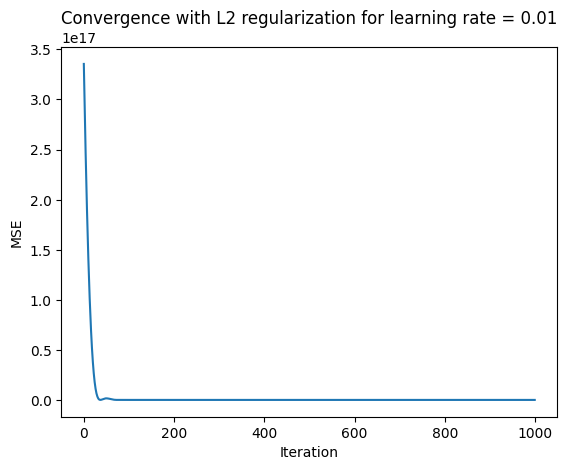

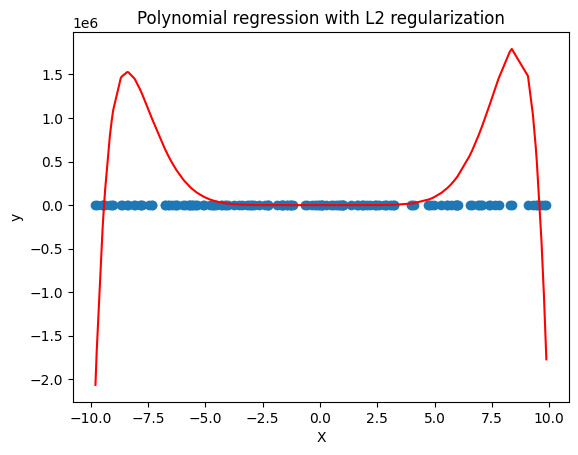

In [412]:
# Apply L2 regularization to the polynomial model
def polymonialRegL2(X, y, learning_rate, degree, epochs, lambda_l2):
    Xh = X.copy()
    yh = y.copy()
    model = torch.nn.Linear(degree, 1)
    
    mse = torch.nn.MSELoss() 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    conv = []
    inputs = Variable(torch.from_numpy(X).float().view(-1, 1))
    labels = Variable(torch.from_numpy(y).float().view(-1, 1))
    for _ in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(torch.cat([inputs**i for i in range(1, degree + 1)], 1))

        loss = mse(outputs, labels)
        l2_reg = torch.tensor(0.)
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss += lambda_l2 * l2_reg
        loss.backward()
        optimizer.step()
        conv.append(loss.item())

    weights = model.weight.detach().numpy().flatten()
    bias = model.bias.item()
    
    print('MSE with L2: {}, model: ws={}, b={}'.format(loss.item(), weights, bias))
    plt.plot(range(epochs), conv)
    plt.title('Convergence with L2 regularization for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    
    plt.scatter(Xh, yh)
    Xh_sorted, yh_sorted = zip(*sorted(zip(Xh, yh)))
    plt.plot(Xh_sorted, sum([weights[i-1] * np.array(Xh_sorted)**i for i in range(1, degree + 1)]) + bias, color='red')
    plt.title('Polynomial regression with L2 regularization')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()
    
    return conv

# Fit polynomial model with L2 regularization
polyConvL2 = polymonialRegL2(X, y, 0.01, 10, 1000, 0.01)

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an sgd from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` sgd.


In [414]:
np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon

def my_sgd(X, y, learning_rate, epochs):
    w = np.random.rand(1)
    b = np.random.rand(1)
    conv = []
    for _ in range(epochs):
        grad = np.array([0., 0.])
        outputs = w * X + b
        loss = np.mean((outputs - y)**2)
        for i in range(len(X)):
            grad[0] += 2 * (outputs[i] - y[i]) * X[i]
            grad[1] += 2 * (outputs[i] - y[i])  
        w -= learning_rate * grad[0]
        b -= learning_rate * grad[1]

        conv.append(loss)
    print('MSE: {}, model: {}'.format(loss, w))
    plt.plot(range(epochs), conv)
    plt.title('Convergence for learning rate = {}'.format(learning_rate))
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.show()
    return conv, w, b

MSE: nan, model: [nan]


C:\Users\Ciepi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Ciepi\AppData\Local\Temp\ipykernel_7616\2736872962.py:13: RuntimeWarning: overflow encountered in square
  loss = np.mean((outputs - y)**2)
C:\Users\Ciepi\AppData\Local\Temp\ipykernel_7616\2736872962.py:15: RuntimeWarning: overflow encountered in scalar add
  grad[0] += 2 * (outputs[i] - y[i]) * X[i]
C:\Users\Ciepi\AppData\Local\Temp\ipykernel_7616\2736872962.py:16: RuntimeWarning: invalid value encountered in scalar add
  grad[1] += 2 * (outputs[i] - y[i])
C:\Users\Ciepi\AppData\Local\Temp\ipykernel_7616\2736872962.py:17: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * grad[0]


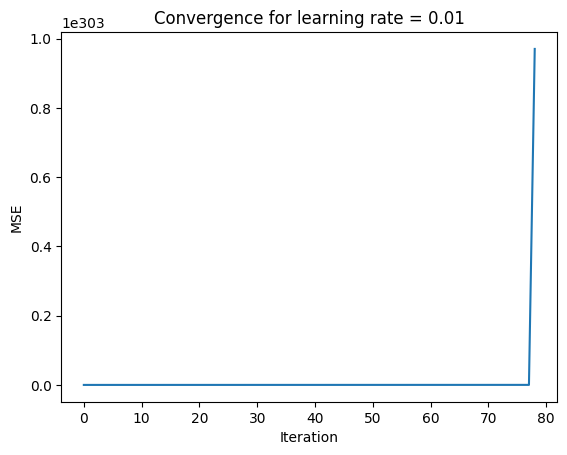

In [415]:
myConv, w, b = my_sgd(X, y, 0.01, 1000)

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [154]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [155]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [156]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.
